In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
# Exercise5-5

     ┌───┐      ░       ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───────░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌───┐ ░ ├───┤└╥┘
q_1: ┤ X ├┤ H ├─░─┤ I ├─░─┤ H ├─╫─
     └───┘└───┘ ░ └───┘ ░ └───┘ ║ 
c: 1/═══════════════════════════╩═
                                0 


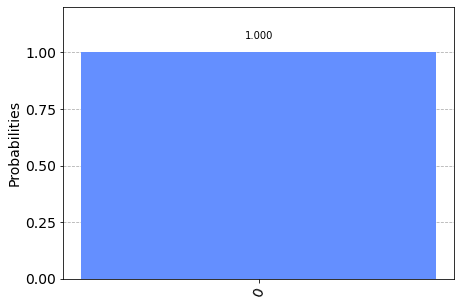


Quantum State (Total execution time: 1000)
|0〉: 100.00%
*** Constant Function ***

---

     ┌───┐      ░       ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───────░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌───┐ ░ ├───┤└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├─╫─
     └───┘└───┘ ░ └───┘ ░ └───┘ ║ 
c: 1/═══════════════════════════╩═
                                0 


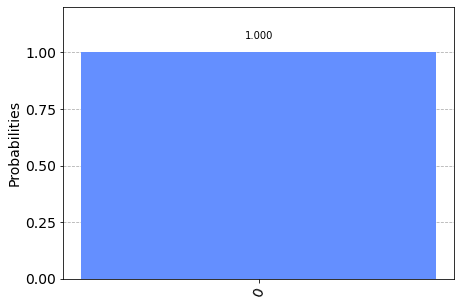


Quantum State (Total execution time: 1000)
|0〉: 100.00%
*** Constant Function ***

---

     ┌───┐      ░       ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───■───░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌─┴─┐ ░ ├───┤└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├─╫─
     └───┘└───┘ ░ └───┘ ░ └───┘ ║ 
c: 1/═══════════════════════════╩═
                                0 


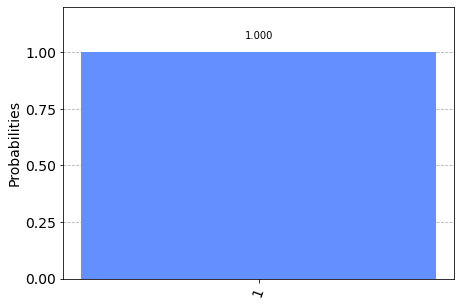


Quantum State (Total execution time: 1000)
|1〉: 100.00%
*** Balance Function ***

---

     ┌───┐      ░            ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───■────────░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌───┐ ░ ├───┤└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░─┤ H ├─╫─
     └───┘└───┘ ░ └───┘└───┘ ░ └───┘ ║ 
c: 1/════════════════════════════════╩═
                                     0 


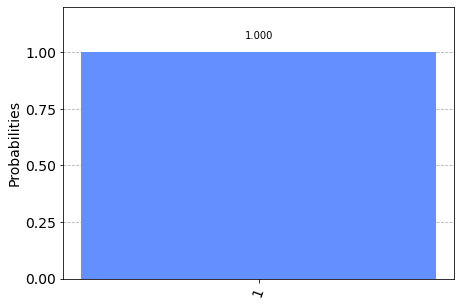


Quantum State (Total execution time: 1000)
|1〉: 100.00%
*** Balance Function ***

---



In [15]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

def showQState(statistic) :
    all_state = sorted(statistic.keys())
    total_count = sum(statistic.values())
    print("\nQuantum State (Total execution time: {})".format(total_count))
    for i in all_state :
        print("|{}〉: {:.2f}%".format(i, statistic[i]/total_count*100))
    if ('0' in all_state) : print("*** Constant Function ***\n\n---\n")
    else : print("*** Balance Function ***\n\n---\n")

# create a quantum circuit
qCircuit0 = QuantumCircuit(2, 1)
qCircuit1 = QuantumCircuit(2, 1)
qCircuit2 = QuantumCircuit(2, 1)
qCircuit3 = QuantumCircuit(2, 1)

# input 
qCircuit0.x(1)
qCircuit0.h(range(2))
qCircuit1.x(1)
qCircuit1.h(range(2))
qCircuit2.x(1)
qCircuit2.h(range(2))
qCircuit3.x(1)
qCircuit3.h(range(2))
qCircuit0.barrier()
qCircuit1.barrier()
qCircuit2.barrier()
qCircuit3.barrier()
# oracle 
qCircuit0.i(1)         # f0(x) = 0
qCircuit1.x(1)         # f1(x) = 1
qCircuit2.cx(0, 1)     # f2(0) = 0, f2(1) = 1
qCircuit3.cx(0, 1)     # f3(0) = 1, f3(1) = 0
qCircuit3.x(1)
qCircuit0.barrier()
qCircuit1.barrier()
qCircuit2.barrier()
qCircuit3.barrier()
# output
qCircuit0.h(range(2))
qCircuit1.h(range(2))
qCircuit2.h(range(2))
qCircuit3.h(range(2))

# show the quantum circuit
qCircuit0.measure(0, 0)
qCircuit1.measure(0, 0)
qCircuit2.measure(0, 0)
qCircuit3.measure(0, 0)

qSimulator = AerSimulator()
# run in Simulator
qCode = transpile(qCircuit0, qSimulator)
execution = execute(qCode, backend=qSimulator, shots=1000)

# show the result
print(qCircuit0)
result = execution.result()
statistic = result.get_counts(qCircuit0)
display(plot_histogram(statistic))
showQState(statistic)

# run in Simulator
qCode = transpile(qCircuit1, qSimulator)
execution = execute(qCode, backend=qSimulator, shots=1000)

# show the result
print(qCircuit1)
result = execution.result()
statistic = result.get_counts(qCircuit1)
display(plot_histogram(statistic))
showQState(statistic)

# run in Simulator
qCode = transpile(qCircuit2, qSimulator)
execution = execute(qCode, backend=qSimulator, shots=1000)

# show the result
print(qCircuit2)
result = execution.result()
statistic = result.get_counts(qCircuit2)
display(plot_histogram(statistic))
showQState(statistic)


# run in Simulator
qCode = transpile(qCircuit3, qSimulator)
execution = execute(qCode, backend=qSimulator, shots=1000)

# show the result
print(qCircuit3)
result = execution.result()
statistic = result.get_counts(qCircuit3)
display(plot_histogram(statistic))
showQState(statistic)